In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class DataAnalyzer:
  def __init__(self, file_path):
    self.data = pd.read_csv(file_path)
    self.listOfMetrics = ['cpu', 'memory', 'taskCompletionTime', 'algorithmTime', 'networkLatency', 'totalTime']
  
  def calculateMetrics(self):
    self.data['taskFinishedAt'] = pd.to_datetime(self.data['taskFinishedAt'])
    self.data['taskStartedAt'] = pd.to_datetime(self.data['taskStartedAt'])
    self.data['taskScheduledAt'] = pd.to_datetime(self.data['taskScheduledAt'])
    self.data['taskReceivedAt'] = pd.to_datetime(self.data['taskReceivedAt'])
    self.data['taskCreatedAt'] = pd.to_datetime(self.data['taskCreatedAt'])

    self.data['taskCompletionTime'] = [ diff.total_seconds() for diff in self.data['taskFinishedAt'] - self.data['taskStartedAt']]
    self.data['algorithmTime'] = [diff.total_seconds() for diff in self.data['taskScheduledAt'] - self.data['taskCreatedAt']]
    self.data['networkLatency'] = [diff.total_seconds() for diff in self.data['taskReceivedAt'] - self.data['taskCreatedAt']]
    self.data['totalTime'] = [diff.total_seconds() for diff in self.data['taskFinishedAt'] - self.data['taskCreatedAt']]
    
    self.getHostMetrics()

  def getHostMetrics(self):
    grouped = self.data.groupby('host', group_keys = False)
    self.data['numberOfVMs'] = grouped.cumcount() + 1
    for metric in self.listOfMetrics:
      self.data['stdDev_'+ metric] = grouped[metric].apply(lambda x: x.expanding().std()) 
      self.data['stdDev_'+ metric].fillna(0, inplace = True)

  def getMetricGraph(self, metric, obj=None):
    if obj is None:
        obj = self
    grouped = obj.data.groupby('numberOfVMs').mean(numeric_only = True)[metric].reset_index()
    if(metric == 'stdDev_cpu' or metric == 'stdDev_memory'):
      grouped[metric] = grouped[metric] * 100
    plt.plot(grouped['numberOfVMs'], grouped[metric], label=obj.__class__.__name__)
    plt.xlabel('Number of VMs')
    if(metric == 'stdDev_cpu' or metric == 'stdDev_memory'):
      plt.ylabel('{0} %'.format(metric))
    else:
      plt.ylabel('{0}'.format(metric))
    plt.legend()
    plt.show()

In [ ]:
def plotMetrics(objects_list, colors_list,policy, metric):
    plt.figure(figsize=(10, 6))
    for i, obj in enumerate(objects_list):
        grouped = obj.data.groupby('numberOfVMs').mean(numeric_only=True)[metric].reset_index()
        if(metric == 'stdDev_cpu' or metric == 'stdDev_memory'):
          grouped[metric] = grouped[metric] * 100
        plt.plot(grouped['numberOfVMs'], grouped[metric], color=colors_list[i], label=policy[i])
    plt.xlabel('Number of VMs')
    if(metric == 'stdDev_cpu' or metric == 'stdDev_memory'):
      plt.ylabel(f'{metric} %')
    else:
      plt.ylabel(f'{metric}')
    plt.legend()
    plt.show()

# Analysis of Probabilistic Scheduling Policy Results

In [ ]:
probabilistic_scheduling_analyzer = DataAnalyzer('https://raw.githubusercontent.com/kaushalkuma-r/Load-Balancer-Implementation/main/Results/Probabilistic_Scheduling.csv')

In [ ]:
probabilistic_scheduling_analyzer.calculateMetrics()
probabilistic_scheduling_analyzer.data.head()

,host,cpu,memory,taskType,taskCreatedAt,taskScheduledAt,taskReceivedAt,taskStartedAt,taskFinishedAt,taskCompletionTime,algorithmTime,networkLatency,totalTime,numberOfVMs,stdDev_cpu,stdDev_memory,stdDev_taskCompletionTime,stdDev_algorithmTime,stdDev_networkLatency,stdDev_totalTime
0,5,56.11,44.27,Medium,2023-04-01 14:00:00,2023-04-01 14:00:06,2023-04-01 14:00:06,2023-04-01 14:00:10,2023-04-01 14:02:10,120.0,6.0,6.0,130.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,4,56.13,44.17,Low,2023-04-01 14:10:00,2023-04-01 14:10:06,2023-04-01 14:15:06,2023-04-01 14:15:08,2023-04-01 14:17:08,120.0,6.0,306.0,428.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,1,56.08,44.08,Low,2023-04-01 14:20:00,2023-04-01 14:20:06,2023-04-01 14:20:06,2023-04-01 14:20:08,2023-04-01 14:21:08,60.0,6.0,6.0,68.0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,3,56.14,44.15,Low,2023-04-01 14:30:00,2023-04-01 14:30:06,2023-04-01 14:35:06,2023-04-01 14:35:08,2023-04-01 14:36:08,60.0,6.0,306.0,368.0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2,56.20,44.15,Low,2023-04-01 14:40:00,2023-04-01 14:40:05,2023-04-01 14:45:05,2023-04-01 14:45:09,2023-04-01 14:47:09,120.0,5.0,305.0,429.0,1,0.0,0.0,0.0,0.0,0.0,0.0


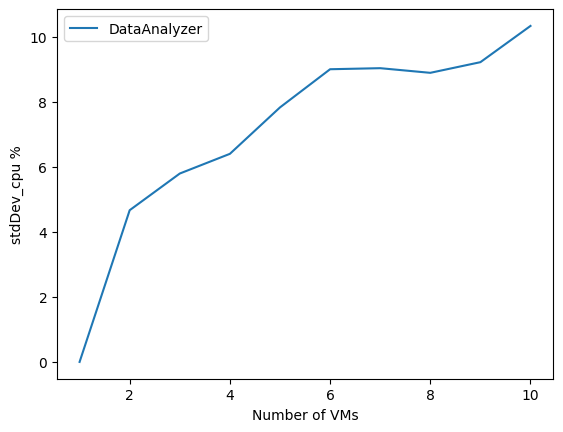

In [ ]:
probabilistic_scheduling_analyzer.getMetricGraph('stdDev_cpu')

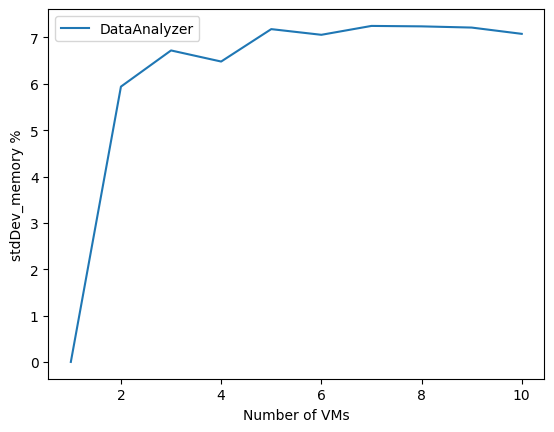

In [ ]:
probabilistic_scheduling_analyzer.getMetricGraph('stdDev_memory')

# Analysis of Round Robin Policy Results



In [ ]:
round_robin_scheduling_analyzer = DataAnalyzer('https://raw.githubusercontent.com/kaushalkuma-r/Load-Balancer-Implementation/main/Results/Round_Robin.csv')

In [ ]:
round_robin_scheduling_analyzer.calculateMetrics()
round_robin_scheduling_analyzer.data.head()

,host,cpu,memory,taskType,taskCreatedAt,taskScheduledAt,taskReceivedAt,taskStartedAt,taskFinishedAt,taskCompletionTime,algorithmTime,networkLatency,totalTime,numberOfVMs,stdDev_cpu,stdDev_memory,stdDev_taskCompletionTime,stdDev_algorithmTime,stdDev_networkLatency,stdDev_totalTime
0,1,55.37,51.33,High,2023-04-01 14:00:00,2023-04-01 14:00:01,2023-04-01 14:05:01,2023-04-01 14:05:02,2023-04-01 14:07:02,120.0,1.0,301.0,422.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2,55.01,51.33,Medium,2023-04-01 14:10:00,2023-04-01 14:10:01,2023-04-01 14:11:01,2023-04-01 14:11:04,2023-04-01 14:13:04,120.0,1.0,61.0,184.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,3,55.35,51.28,Low,2023-04-01 14:20:00,2023-04-01 14:20:02,2023-04-01 14:25:02,2023-04-01 14:25:04,2023-04-01 14:27:04,120.0,2.0,302.0,424.0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,4,55.17,51.38,Medium,2023-04-01 14:30:00,2023-04-01 14:30:02,2023-04-01 14:30:02,2023-04-01 14:30:05,2023-04-01 14:31:05,60.0,2.0,2.0,65.0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,5,55.35,51.41,Medium,2023-04-01 14:40:00,2023-04-01 14:40:01,2023-04-01 14:43:01,2023-04-01 14:43:04,2023-04-01 14:45:04,120.0,1.0,181.0,304.0,1,0.0,0.0,0.0,0.0,0.0,0.0


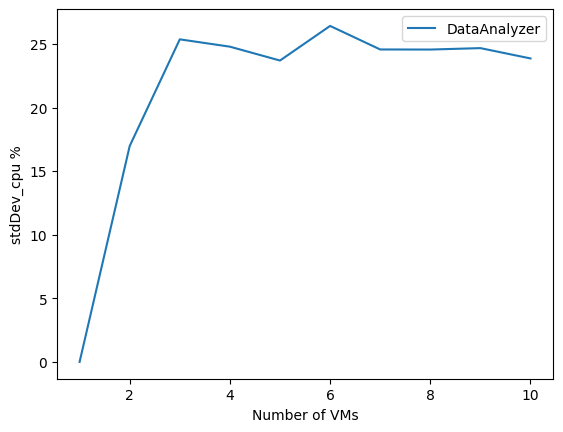

In [ ]:
round_robin_scheduling_analyzer.getMetricGraph('stdDev_cpu')

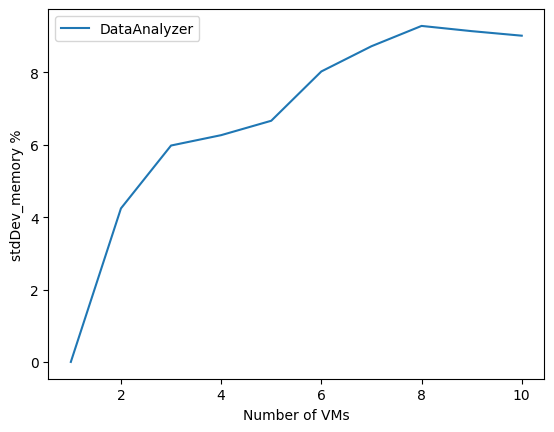

In [ ]:
round_robin_scheduling_analyzer.getMetricGraph('stdDev_memory')

# Analysis of Weighted Round Robin Policy Results



In [ ]:
weighted_round_robin_scheduling_analyzer = DataAnalyzer('https://raw.githubusercontent.com/kaushalkuma-r/Load-Balancer-Implementation/main/Results/Weighted_Round_Robin.csv')

In [ ]:
weighted_round_robin_scheduling_analyzer.calculateMetrics()
weighted_round_robin_scheduling_analyzer.data.head()

,host,cpu,memory,taskType,taskCreatedAt,taskScheduledAt,taskReceivedAt,taskStartedAt,taskFinishedAt,taskCompletionTime,algorithmTime,networkLatency,totalTime,numberOfVMs,stdDev_cpu,stdDev_memory,stdDev_taskCompletionTime,stdDev_algorithmTime,stdDev_networkLatency,stdDev_totalTime
0,3,52.95,43.24,Medium,2023-04-01 14:00:00,2023-04-01 14:00:02,2023-04-01 14:05:02,2023-04-01 14:05:03,2023-04-01 14:06:03,60.0,2.0,302.0,363.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,52.79,43.30,Medium,2023-04-01 14:10:00,2023-04-01 14:10:02,2023-04-01 14:11:02,2023-04-01 14:11:05,2023-04-01 14:13:05,120.0,2.0,62.0,185.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,52.64,43.23,Medium,2023-04-01 14:20:00,2023-04-01 14:20:01,2023-04-01 14:23:01,2023-04-01 14:23:03,2023-04-01 14:24:03,60.0,1.0,181.0,243.0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,4,52.67,43.20,Low,2023-04-01 14:30:00,2023-04-01 14:30:01,2023-04-01 14:35:01,2023-04-01 14:35:03,2023-04-01 14:37:03,120.0,1.0,301.0,423.0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2,52.85,43.17,Low,2023-04-01 14:40:00,2023-04-01 14:40:01,2023-04-01 14:43:01,2023-04-01 14:43:02,2023-04-01 14:44:02,60.0,1.0,181.0,242.0,1,0.0,0.0,0.0,0.0,0.0,0.0


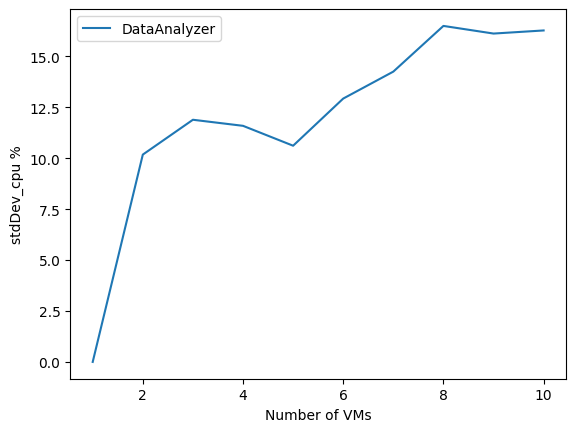

In [ ]:
weighted_round_robin_scheduling_analyzer.getMetricGraph('stdDev_cpu')

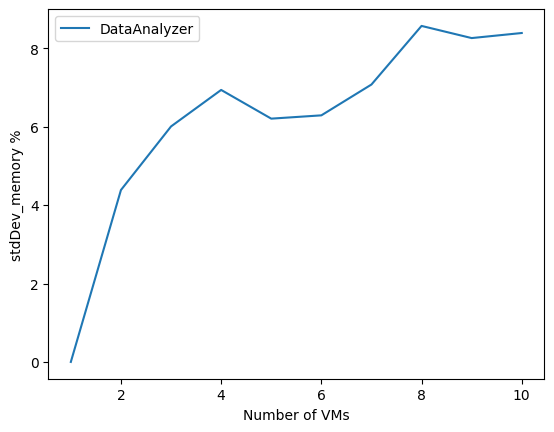

In [ ]:
weighted_round_robin_scheduling_analyzer.getMetricGraph('stdDev_memory')

Testing changes

In [ ]:
objects=[weighted_round_robin_scheduling_analyzer,round_robin_scheduling_analyzer,probabilistic_scheduling_analyzer]
policy_names=["Weighted Round Robin","Round Robin","Probabilistic Roulette Wheel"]

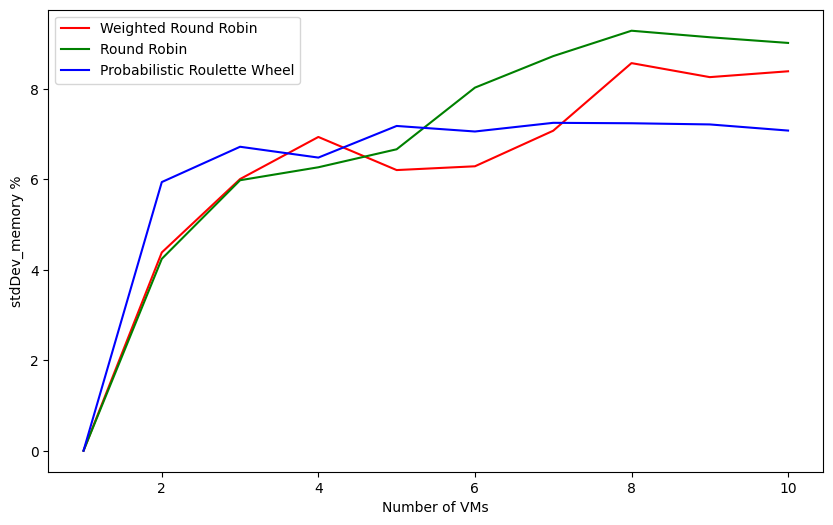

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"stdDev_memory")

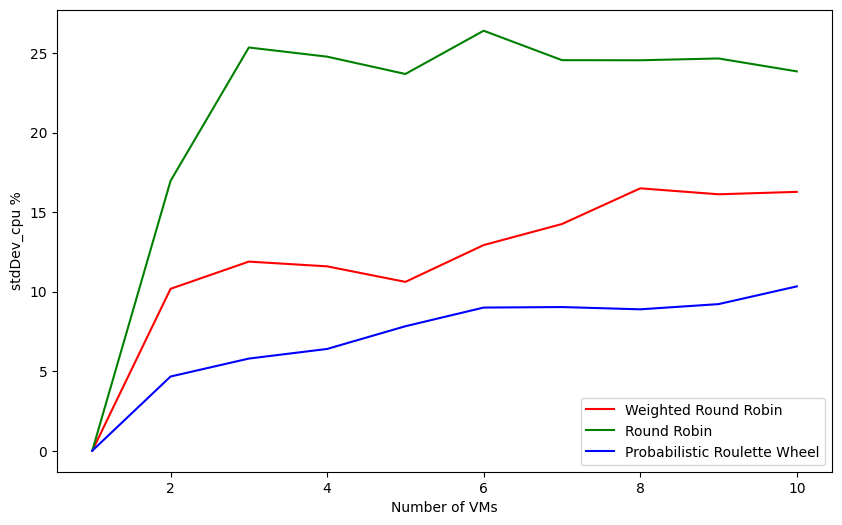

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"stdDev_cpu")

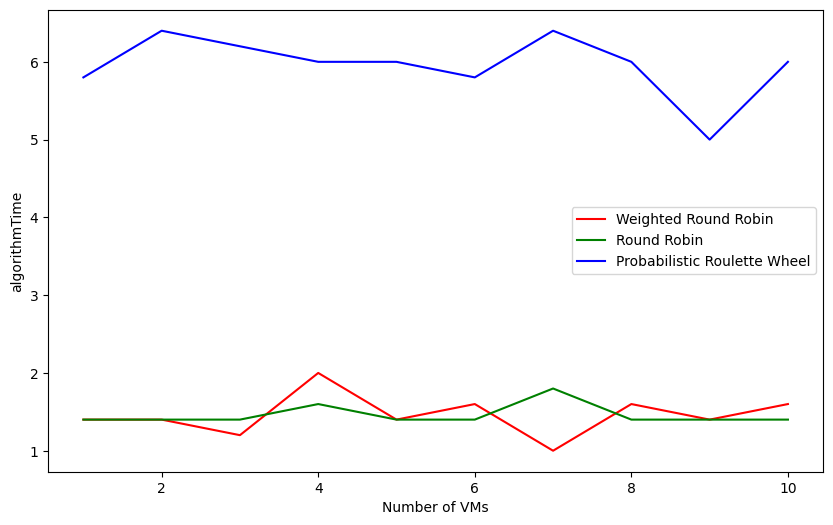

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"algorithmTime")

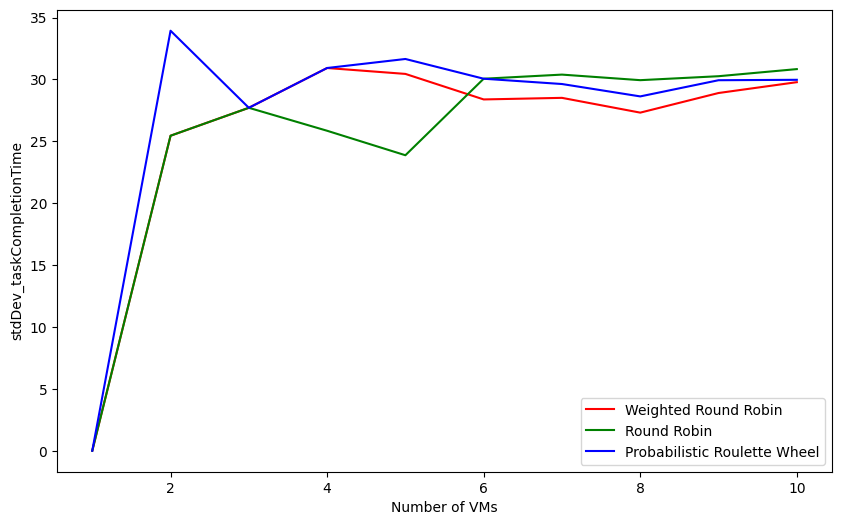

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"stdDev_taskCompletionTime")

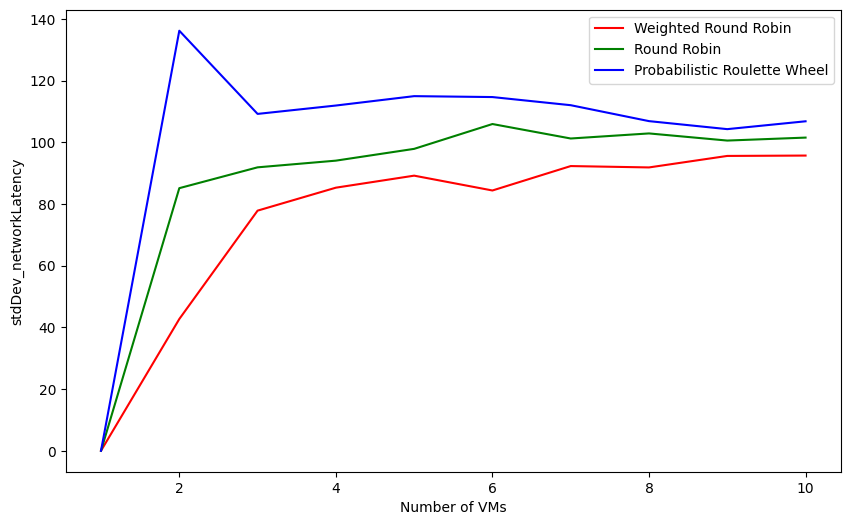

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"stdDev_networkLatency")

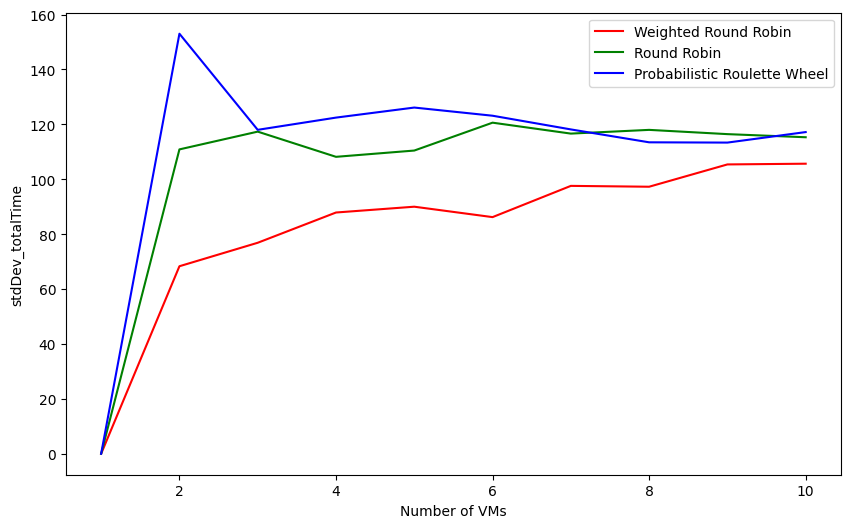

In [ ]:
plotMetrics(objects,['r','g','b'],policy_names,"stdDev_totalTime")